In [1]:
import pandas as pd 
import geopandas as geo
import fiona
import warnings
import numpy as np
import json

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
cf = pd.read_excel("/Users/natalie_kraft/Documents/LAS/AidDatasGlobalChineseDevelopmentFinanceDataset_v2.0.xlsx", sheet_name='Global_CDF2.0')

In [3]:
f = cf['Recipient'].value_counts() 

cf[cf['Recipient'] == "Sweden"]

,AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Commitment Year Estimated,Implementation Start Year,Completion Year,Title,Description,Staff Comments,Status,Intent,Flow Type,Concessional,Flow Class,Sector Code,Sector Name,Funding Agencies,Funding Agencies Type,Cofinanced,Cofinancing Agencies,Cofinancing Agencies Type,Cofinancing Agencies Origin,Receiving Agencies,Receiving Agencies Type,Receiving Agencies Origin,Implementing Agencies,Implementing Agencies Type,Implementing Agencies Origin,Accountable Agencies,Accountable Agencies Type,Accountable Agencies Origin,Amount (Original Currency),Original Currency,Amount (Constant USD2017),Amount (Nominal),Planned Implementation Start Date (MM/DD/YYYY),Planned Completion Date (MM/DD/YYYY),Actual Implementation Start Date (MM/DD/YYYY),Actual Completion Date (MM/DD/YYYY),Loan Type,Maturity,Interest Rate,Grace Period,Management Fee,Commitment Fee,Grant Element,Guarantee Provided,Insurance Provided,Collateralized/Securitized,Collateral,Official Source Count,Unofficial Source Count,Source URLs,Source Titles,Source Publishers,Source Type,Geographic Location,geoJSON URL Viz,geoJSON URL DL,Contact Name,Contact Position,ODA Eligible Recipient,Source Quality Score,Data Completeness Score,Project Implementation Score,Loan Detail Score


In [4]:
file = open('/Users/natalie_kraft/Documents/LAS/Islands.json')

json = json.load(file)

In [5]:
# shape = geo.read_file('/Users/natalie_kraft/Documents/LAS/countries.geojson')

# 2019 Data Set 
path_raw_file_2019 = '/Users/natalie_kraft/Documents/LAS/PewData/Pew2019.csv'
# 2018 Data Set 
path_raw_file_2018 = '/Users/natalie_kraft/Documents/LAS/PewData/Pew2018.csv'
# 2017 Data Set 
path_raw_file_2017 = '/Users/natalie_kraft/Documents/LAS/PewData/Pew2017.csv'
# 2016 Data Set 
path_raw_file_2016 = '/Users/natalie_kraft/Documents/LAS/PewData/Pew2016.csv'
# 2015 Data Set 
path_raw_file_2015 = '/Users/natalie_kraft/Documents/LAS/PewData/Pew2015.csv'

### Read in Data

In [6]:
d19 = pd.read_csv(path_raw_file_2019)
d18 = pd.read_csv(path_raw_file_2018)
d17 = pd.read_csv(path_raw_file_2017)
d16 = pd.read_csv(path_raw_file_2016)
d15 = pd.read_csv(path_raw_file_2015)

In [7]:
# Add in temporal component to dataset 
d19['year'] = 2019
d18['year'] = 2018
d17['year'] = 2017
d16['year'] = 2016
d15['year'] = 2015

# Move all attribute names to lowercase 
d19.columns = d19.columns.str.lower()
d18.columns = d18.columns.str.lower()
d17.columns = d17.columns.str.lower()
d16.columns = d16.columns.str.lower()
d15.columns = d15.columns.str.lower()

### Each DF year has different country mappings 

Build them out to have common string variable for comparison

In [8]:
CMap19 = {
    1: "Argentina", 
    2: "Australia", 
    3: "Brazil", 
    4: "Bulgaria", 
    5: "Canada", 
    6: "Czech Republic", 
    7: "France", 
    8: "Germany", 
    9: "Greece", 
    10: "Hungary", 
    11: "India", 
    12: "Indonesia", 
    13: "Israel", 
    14: "Italy", 
    15: "Japan",
    16: "Kenya", 
    17: "Lebanon", 
    18: "Lithuania", 
    19: "Mexico", 
    20: "Netherlands", 
    21: "Nigeria", 
    22: "Philippines", 
    23: "Poland", 
    24: "Russia", 
    25: "Slovakia", 
    26: "South Africa", 
    27: "South Korea", 
    28: "Spain", 
    29: "Sweden", 
    30: "Tunisia", 
    31: "Turkey", 
    32: "Ukraine", 
    33: "United Kingdom", 
    34: "United States"  
}

CMap18 = {
    1: "Argentina", 
    2: "Australia", 
    3: "Brazil", 
    4: "Canada", 
    5: "France", 
    6: "Germany", 
    7: "Greece", 
    8: "Hungary", 
    9: "India", 
    10: "Indonesia", 
    11: "Israel", 
    12: "Italy", 
    13: "Japan",
    14: "Kenya", 
    15: "Mexico", 
    16: "Netherlands", 
    17: "Nigeria", 
    18: "Philippines", 
    19: "Poland", 
    20: "Russia", 
    21: "South Africa", 
    22: "South Korea", 
    23: "Spain", 
    24: "Sweden", 
    25: "Tunisia", 
    26: "United Kingdom", 
    27: "United States"
}

CMap17 = {
    1: "Argentina", 
    2: "Australia", 
    3: "Brazil", 
    4: "Canada", 
    5: "Chile", 
    6: "Colombia",
    7: "France", 
    8: "Germany", 
    9: "Ghana",
    10: "Greece", 
    11: "Hungary", 
    12: "India", 
    13: "Indonesia", 
    14: "Israel", 
    15: "Italy", 
    16: "Japan",
    17: "Jordan",
    18: "Kenya", 
    19: "Lebanon", 
    20: "Mexico", 
    21: "Netherlands", 
    22: "Nigeria", 
    23: "Peru",
    24: "Philippines", 
    25: "Poland", 
    26: "Russia", 
    27: "Senegal", 
    28: "South Africa", 
    29: "South Korea", 
    30: "Spain", 
    31: "Sweden", 
    32: "Tanzania",
    33: "Tunisia", 
    34: "Turkey", 
    35: "United Kingdom", 
    36: "United States",
    37: "Venezula",
    38: "Vietnam"
}

CMap16 = {
    1: "Australia", 
    2: "Canada", 
    3: "China", 
    4: "France", 
    5: "Germany", 
    6: "Greece", 
    7: "Hungary", 
    8: "India",  
    9: "Italy", 
    10: "Japan",
    11: "Kenya", 
    12: "Netherlands", 
    13: "Nigeria", 
    14: "Poland", 
    15: "South Africa", 
    16: "Spain", 
    17: "Sweden", 
    18: "United Kingdom", 
    19: "United States"
}

CMap15 = {
    1: "Argentina", 
    2: "Australia", 
    3: "Brazil", 
    4: "Burkina Faso",
    5: "Chile", 
    6: "China",
    7: "Canada", 
    8: "Ethiopia", 
    9: "France", 
    10: "Germany", 
    11: "Ghana",
    12: "India", 
    13: "Indonesia", 
    14: "Israel", 
    15: "Italy", 
    16: "Japan",
    17: "Jordan",
    18: "Kenya", 
    19: "Lebanon", 
    20: "Malaysia", 
    21: "Mexico", 
    22: "Nigeria", 
    23: "Pakistan", 
    24: "Palestinian territories", 
    25: "Peru",
    26: "Philippines", 
    27: "Poland", 
    28: "Russia", 
    29: "Senegal", 
    30: "South Africa", 
    31: "South Korea", 
    32: "Spain", 
    33: "Tanzania",
    34: "Turkey", 
    35: "Uganda", 
    36: "Ukraine", 
    37: "United Kingdom", 
    38: "United States",
    39: "Venezula",
    40: "Vietnam"
}

d19['country'] = d19['country'].map(CMap19)
d18['country'] = d18['country'].map(CMap18)
d17['country'] = d17['country'].map(CMap17)
d16['country'] = d16['country'].map(CMap16)
d15['country'] = d15['country'].map(CMap15)

### Each DF has a different order for Italian mappings

In [9]:
regionMapping19 = {
    '1': 'Central',
    '2': 'Islands',
    '3': 'North East',
    '4': 'North West',
    '5': 'South'
}

regionMapping18 = {
    '1': 'North West',
    '2': 'North East',
    '3': 'Central',
    '4': 'South',
    '5': 'Islands'
}

regionMapping17 = {
    '1': 'North West',
    '2': 'South',
    '3': 'Islands',
    '4': 'North East',
    '5': 'Central'
}

regionMapping16 = {
    '1': 'North West',
    '2': 'South',
    '3': 'Islands',
    '4': 'North East',
    '5': 'Central'
}

regionMapping15 = {
    '1': 'North West',
    '2': 'North East',
    '3': 'Central',
    '4': 'South',
}

d19['qs5ita'] = d19['qs5ita'].apply(lambda x: x[-1:]).map(regionMapping19)
d18['qs5ita'] = d18['qs5ita'].apply(lambda x: x[-1:]).map(regionMapping18)
d17['qs5ita'] = d17['qs5ita'].apply(lambda x: x[-1:]).map(regionMapping17)
d16['qs5ita'] = d16['qs5ita'].apply(lambda x: x[-1:]).map(regionMapping16)
d15['q213ita'] = d15['q213ita'].apply(lambda x: x[-1:]).map(regionMapping15)

### Remove non-cross sectional data 

In [10]:
df = pd.concat([d19, d18, d17], join="inner")

In [11]:
df[df['country'] == 'Italy']['econ_power'].replace(" ", np.nan).dropna().astype(int).mean() / df['econ_power'].replace(" ", np.nan).dropna().astype(int).mean()

0.9430171720578981

In [12]:
list(df.columns)

['id',
 'survey',
 'country',
 'weight',
 'country_satis',
 'econ_sit',
 'children_betteroff2',
 'satisfied_democracy',
 'fav_us',
 'fav_china',
 'fav_russia',
 'fav_eu',
 'partyfav_france_lesrepublicains',
 'partyfav_france_socialistparty',
 'partyfav_france_frontnational',
 'partyfav_france_enmarche',
 'partyfav_germany_cdu',
 'partyfav_germany_spd',
 'partyfav_germany_afd',
 'partyfav_germany_dielinke',
 'partyfav_greece_syriza',
 'partyfav_greece_newdemocracy',
 'partyfav_greece_demcoal',
 'partyfav_greece_goldend',
 'partyfav_hungary_fidesz',
 'partyfav_hungary_mszp',
 'partyfav_hungary_jobbik',
 'partyfav_italy_forza',
 'partyfav_italy_demparty',
 'partyfav_italy_5star',
 'partyfav_italy_leganord',
 'partyfav_netherlands_vvd',
 'partyfav_netherlands_labour',
 'partyfav_netherlands_pvv',
 'partyfav_netherlands_socialist',
 'partyfav_poland_pis',
 'partyfav_poland_po',
 'partyfav_poland_kukiz',
 'partyfav_poland_nowoczesna',
 'partyfav_poland_psl',
 'partyfav_spain_pp',
 'partyfav_

### Getting the Temporal Elements of Pew Data Addressed for Italy

In [13]:
it = df[df['country'] == 'Italy'].reset_index()
it.head()

,index,id,survey,country,weight,country_satis,econ_sit,children_betteroff2,satisfied_democracy,fav_us,fav_china,fav_russia,fav_eu,partyfav_france_lesrepublicains,partyfav_france_socialistparty,partyfav_france_frontnational,partyfav_france_enmarche,partyfav_germany_cdu,partyfav_germany_spd,partyfav_germany_afd,partyfav_germany_dielinke,partyfav_greece_syriza,partyfav_greece_newdemocracy,partyfav_greece_demcoal,partyfav_greece_goldend,partyfav_hungary_fidesz,partyfav_hungary_mszp,partyfav_hungary_jobbik,partyfav_italy_forza,partyfav_italy_demparty,partyfav_italy_5star,partyfav_italy_leganord,partyfav_netherlands_vvd,partyfav_netherlands_labour,partyfav_netherlands_pvv,partyfav_netherlands_socialist,partyfav_poland_pis,partyfav_poland_po,partyfav_poland_kukiz,partyfav_poland_nowoczesna,partyfav_poland_psl,partyfav_spain_pp,partyfav_spain_psoe,partyfav_spain_podemos,partyfav_spain_citizens,partyfav_sweden_sap,partyfav_sweden_moderateparty,partyfav_sweden_swedendems,partyfav_uk_conservative,partyfav_uk_labour,partyfav_uk_ukip,partyfav_uk_libdems,econ_power,confid_trump,confid_xi,confid_putin,confid_merkel,use_internet,own_cell_standalone,smartphone,social_net,mex_live_us,sex,age,travel_us,friends_abroad_intouch,friends_us_intouch,receive_money,d_relig_argentina,d_relig_australia,d_relig_brazil,d_relig_canada,d_relig_france,d_relig_germany,d_relig_greece,d_relig_hungary,d_relig_india_a,d_relig2_india_a,d_relig_indonesia,d_relig_israel,d_relig_israel_jewish,d_relig_japan_a,d_relig_kenya,d_relig_mexico,d_relig_netherlands,d_relig_nigeria,d_relig_philippines,d_relig_poland,d_relig_russia,d_relig_safrica,d_relig_skorea_a,d_relig_spain,d_relig_sweden,d_relig_tunisia,d_relig_uk,d_relig_us,d_relig_us_christian,d_relig_us2,muslim_branch,pray_several,pray_salah,religion_import,d_educ_argentina_2017,d_educ_australia_2017,d_educ_australia_2017a,d_educ_australia_2017b,d_educ_brazil,d_educ_canada_2017,d_educ_france,d_educ_germany_2017,d_educ_germany_vocational,d_educ_greece,d_educ_hungary,d_educ_india,d_educ_indonesia,d_educ_israel,d_educ_israel_vocational,d_educ_israel_years,d_educ_italy_2017,d_educ_japan,d_educ_kenya,d_educ_mexico_2017,d_educ_netherlands,d_educ_nigeria,d_educ_philippines,d_educ_poland_2017,d_educ_safrica_2017,d_educ_skorea_2017,d_educ_spain,d_educ_sweden,d_educ_tunisia_2017,d_educ_uk_2017,d_educ_us_2017,d_income_argentina,d_income_australia,d_income_brazil,d_income_canada,d_income_france,d_income_germany,d_income_greece,d_income_hungary,d_income_india,d_income_indonesia,d_income_israel,d_income_italy,d_income_japan,d_income_kenya,d_income_mexico,d_income_netherlands,d_income_nigeria,d_income_philippines,d_income_poland,d_income_russia,d_income_safrica,d_income_skorea,d_income_spain,d_income_sweden,d_income_tunisia,d_income_uk_cat,d_income_uk_month,d_income_uk_week,d_income_uk_year,d_income_us,d_income2_argentina,d_income2_australia,d_income2_brazil,d_income2_canada,d_income2_france,d_income2_germany,d_income2_greece,d_income2_hungary,d_income2_india,d_income2_indonesia,d_income2_israel,d_income2_italy,d_income2_japan,d_income2_kenya,d_income2_mexico,d_income2_netherlands,d_income2_nigeria,d_income2_philippines,d_income2_poland,d_income2_russia,d_income2_safrica,d_income2_skorea,d_income2_spain,d_income2_sweden,d_income2_tunisia,d_income2_uk,d_income2_us,d_ethnicity_brazil,d_ethnicity_indonesia,d_ethnicity_israel,d_ethnicity_kenya,d_ethnicity_nigeria,d_ethnicity_philippines,d_ethnicity_safrica,d_hisp_originus,d_race_us_2,d_race_us_3,d_race_us_4,d_born_us,d_hhpeople,d_adult_us,political_scale2,d_ptyid_proximity_argentina,d_ptyid_proximity_australia,d_ptyid_proximity_brazil,d_ptyid_proximity_canada,d_ptyid_proximity_france,d_ptyid_proximity_germany,d_ptyid_proximity_greece,d_ptyid_proximity_hungary,d_ptyid_proximity_india,d_ptyid_proximity_indonesia,d_ptyid_proximity_israel,d_ptyid_proximity_italy,d_ptyid_proximity_kenya,d_ptyid_proximity_mexico,d_ptyid_proximity_netherlands,d_ptyid_proximity_nigeria,d_ptyid_proximity_philippines

In [14]:
variables = ['fav_us', 'fav_russia', 'fav_china',  'econ_sit',
             'children_betteroff2', 'partyfav_italy_forza',
             'partyfav_italy_demparty', 'partyfav_italy_5star', 'partyfav_italy_leganord', 'sex', 'age', 
             'd_educ_italy_2017', 'd_income_italy', 'country_satis', 'fav_eu', 'satisfied_democracy', 
             'econ_power','confid_xi', 'd_income2_italy']


standardvars = ['region', 'year', 'num_surveyed', 'us_v_china_ave', 'us_over_china', 'us_v_russia_ave', 'us_over_russia', 
       'russia_v_china_ave', 'russia_over_china']

cols = ['region', 'year', 'num_surveyed', 'us_v_china_ave', 'us_over_china', 'us_v_russia_ave', 'us_over_russia', 
       'russia_v_china_ave', 'russia_over_china']

for i in variables: 
    cols.append(i + '_ave')
    cols.append(i + '_stddev')
    cols.append(i + '_comp_static_it')
    cols.append(i + '_comp_static_world')
    cols.append(i + '_comp_current_it')
    cols.append(i + '_comp_current_world')
        
standardvars = list(set(cols).difference(set(standardvars)))

In [15]:
rita = pd.DataFrame(columns=cols)

In [16]:
t = it.groupby(['year', 'qs5ita'])['age'].count().reset_index().rename(columns={"age":"num_surveyed", "qs5ita":"region"})
rita['year'] = t['year']
rita['region'] = t['region']
rita['num_surveyed'] = t['num_surveyed']
rita

,region,year,num_surveyed,us_v_china_ave,us_over_china,us_v_russia_ave,us_over_russia,russia_v_china_ave,russia_over_china,fav_us_ave,fav_us_stddev,fav_us_comp_static_it,fav_us_comp_static_world,fav_us_comp_current_it,fav_us_comp_current_world,fav_russia_ave,fav_russia_stddev,fav_russia_comp_static_it,fav_russia_comp_static_world,fav_russia_comp_current_it,fav_russia_comp_current_world,fav_china_ave,fav_china_stddev,fav_china_comp_static_it,fav_china_comp_static_world,fav_china_comp_current_it,fav_china_comp_current_world,econ_sit_ave,econ_sit_stddev,econ_sit_comp_static_it,econ_sit_comp_static_world,econ_sit_comp_current_it,econ_sit_comp_current_world,children_betteroff2_ave,children_betteroff2_stddev,children_betteroff2_comp_static_it,children_betteroff2_comp_static_world,children_betteroff2_comp_current_it,children_betteroff2_comp_current_world,partyfav_italy_forza_ave,partyfav_italy_forza_stddev,partyfav_italy_forza_comp_static_it,partyfav_italy_forza_comp_static_world,partyfav_italy_forza_comp_current_it,partyfav_italy_forza_comp_current_world,partyfav_italy_demparty_ave,partyfav_italy_demparty_stddev,partyfav_italy_demparty_comp_static_it,partyfav_italy_demparty_comp_static_world,partyfav_italy_demparty_comp_current_it,partyfav_italy_demparty_comp_current_world,partyfav_italy_5star_ave,partyfav_italy_5star_stddev,partyfav_italy_5star_comp_static_it,partyfav_italy_5star_comp_static_world,partyfav_italy_5star_comp_current_it,partyfav_italy_5star_comp_current_world,partyfav_italy_leganord_ave,partyfav_italy_leganord_stddev,partyfav_italy_leganord_comp_static_it,partyfav_italy_leganord_comp_static_world,partyfav_italy_leganord_comp_current_it,partyfav_italy_leganord_comp_current_world,sex_ave,sex_stddev,sex_comp_static_it,sex_comp_static_world,sex_comp_current_it,sex_comp_current_world,age_ave,age_stddev,age_comp_static_it,age_comp_static_world,age_comp_current_it,age_comp_current_world,d_educ_italy_2017_ave,d_educ_italy_2017_stddev,d_educ_italy_2017_comp_static_it,d_educ_italy_2017_comp_static_world,d_educ_italy_2017_comp_current_it,d_educ_italy_2017_comp_current_world,d_income_italy_ave,d_income_italy_stddev,d_income_italy_comp_static_it,d_income_italy_comp_static_world,d_income_italy_comp_current_it,d_income_italy_comp_current_world,country_satis_ave,country_satis_stddev,country_satis_comp_static_it,country_satis_comp_static_world,country_satis_comp_current_it,country_satis_comp_current_world,fav_eu_ave,fav_eu_stddev,fav_eu_comp_static_it,fav_eu_comp_static_world,fav_eu_comp_current_it,fav_eu_comp_current_world,satisfied_democracy_ave,satisfied_democracy_stddev,satisfied_democracy_comp_static_it,satisfied_democracy_comp_static_world,satisfied_democracy_comp_current_it,satisfied_democracy_comp_current_world,econ_power_ave,econ_power_stddev,econ_power_comp_static_it,econ_power_comp_static_world,econ_power_comp_current_it,econ_power_comp_current_world,confid_xi_ave,confid_xi_stddev,confid_xi_comp_static_it,confid_xi_comp_static_world,confid_xi_comp_current_it,confid_xi_comp_current_world,d_income2_italy_ave,d_income2_italy_stddev,d_income2_italy_comp_static_it,d_income2_italy_comp_static_world,d_income2_italy_comp_current_it,d_income2_italy_comp_current_world
0,Central,2017,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Islands,2017,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [17]:
def computeDiff(us_val, other_val, calc): 
    diff = us_val - other_val 
    
    if calc == 'ave':
        return round((diff.sum() / len(diff)), 2)
    
    if calc == 'prefer_us':
        return round((diff[diff > 0].count() * 100 / len(diff)), 2)

In [18]:
def compareData(main_val, comparison_val): 
    
    thres = comparison_val.mean()
    if thres is np.nan: 
        return -1

    else:
        return round((main_val[main_val >= thres].count() * 100 / len(main_val)), 2)

In [19]:
def check_for_variable_availability(var, data): 
    
    print(len(data[var]))
    print(data[var].value_counts())
    if len(data[var].dropna()) > 0: 
        return True 
    else: 
        return False

In [20]:
it = it.replace(r'^\s*$', np.nan, regex=True)

In [21]:
for i in range(0, len(rita)): 
    
    # get the correct region and year to compute
    data = it.loc[(it['year'] == rita['year'][i]) & (it['qs5ita'] == rita['region'][i])].replace(r'^\s*$', np.nan, regex=True)
    
    # determine the comparisons between US and China/Russia favorability
    rita['us_v_china_ave'][i] = computeDiff(data['fav_us'], data['fav_china'], 'ave')
    rita['us_over_china'][i] = computeDiff(data['fav_us'], data['fav_china'], 'prefer_us')
    
    rita['us_v_russia_ave'][i] = computeDiff(data['fav_us'], data['fav_russia'], 'ave')
    rita['us_over_russia'][i] = computeDiff(data['fav_us'], data['fav_russia'], 'prefer_us')
    
    rita['russia_v_china_ave'][i] = computeDiff(data['fav_russia'], data['fav_china'], 'ave')
    rita['russia_over_china'][i] = computeDiff(data['fav_russia'], data['fav_china'], 'prefer_us')

    for var in variables: 
        
        variableData = data[var].astype(float)
        rita[var + '_ave'][i] = round(variableData.mean(), 2)
        rita[var + '_stddev'][i] = round(variableData.std(), 2)
        rita[var + '_comp_static_it'][i] = compareData(variableData, it[it['year'] == rita['year'][i]][var].replace(r'^\s*$', np.nan, regex=True).dropna().astype(float))
        rita[var + '_comp_static_world'][i] = compareData(variableData, df[df['year'] == rita['year'][i]][var].replace(r'^\s*$', np.nan, regex=True).dropna().astype(float))
        rita[var + '_comp_current_it'][i] = compareData(variableData, it[it['year'] == 2019][var].replace(r'^\s*$', np.nan, regex=True).dropna().astype(float))
        rita[var + '_comp_current_world'][i] = compareData(variableData, df[df['year'] == 2019][var].replace(r'^\s*$', np.nan, regex=True).dropna().astype(float))

In [22]:
rita

,region,year,num_surveyed,us_v_china_ave,us_over_china,us_v_russia_ave,us_over_russia,russia_v_china_ave,russia_over_china,fav_us_ave,fav_us_stddev,fav_us_comp_static_it,fav_us_comp_static_world,fav_us_comp_current_it,fav_us_comp_current_world,fav_russia_ave,fav_russia_stddev,fav_russia_comp_static_it,fav_russia_comp_static_world,fav_russia_comp_current_it,fav_russia_comp_current_world,fav_china_ave,fav_china_stddev,fav_china_comp_static_it,fav_china_comp_static_world,fav_china_comp_current_it,fav_china_comp_current_world,econ_sit_ave,econ_sit_stddev,econ_sit_comp_static_it,econ_sit_comp_static_world,econ_sit_comp_current_it,econ_sit_comp_current_world,children_betteroff2_ave,children_betteroff2_stddev,children_betteroff2_comp_static_it,children_betteroff2_comp_static_world,children_betteroff2_comp_current_it,children_betteroff2_comp_current_world,partyfav_italy_forza_ave,partyfav_italy_forza_stddev,partyfav_italy_forza_comp_static_it,partyfav_italy_forza_comp_static_world,partyfav_italy_forza_comp_current_it,partyfav_italy_forza_comp_current_world,partyfav_italy_demparty_ave,partyfav_italy_demparty_stddev,partyfav_italy_demparty_comp_static_it,partyfav_italy_demparty_comp_static_world,partyfav_italy_demparty_comp_current_it,partyfav_italy_demparty_comp_current_world,partyfav_italy_5star_ave,partyfav_italy_5star_stddev,partyfav_italy_5star_comp_static_it,partyfav_italy_5star_comp_static_world,partyfav_italy_5star_comp_current_it,partyfav_italy_5star_comp_current_world,partyfav_italy_leganord_ave,partyfav_italy_leganord_stddev,partyfav_italy_leganord_comp_static_it,partyfav_italy_leganord_comp_static_world,partyfav_italy_leganord_comp_current_it,partyfav_italy_leganord_comp_current_world,sex_ave,sex_stddev,sex_comp_static_it,sex_comp_static_world,sex_comp_current_it,sex_comp_current_world,age_ave,age_stddev,age_comp_static_it,age_comp_static_world,age_comp_current_it,age_comp_current_world,d_educ_italy_2017_ave,d_educ_italy_2017_stddev,d_educ_italy_2017_comp_static_it,d_educ_italy_2017_comp_static_world,d_educ_italy_2017_comp_current_it,d_educ_italy_2017_comp_current_world,d_income_italy_ave,d_income_italy_stddev,d_income_italy_comp_static_it,d_income_italy_comp_static_world,d_income_italy_comp_current_it,d_income_italy_comp_current_world,country_satis_ave,country_satis_stddev,country_satis_comp_static_it,country_satis_comp_static_world,country_satis_comp_current_it,country_satis_comp_current_world,fav_eu_ave,fav_eu_stddev,fav_eu_comp_static_it,fav_eu_comp_static_world,fav_eu_comp_current_it,fav_eu_comp_current_world,satisfied_democracy_ave,satisfied_democracy_stddev,satisfied_democracy_comp_static_it,satisfied_democracy_comp_static_world,satisfied_democracy_comp_current_it,satisfied_democracy_comp_current_world,econ_power_ave,econ_power_stddev,econ_power_comp_static_it,econ_power_comp_static_world,econ_power_comp_current_it,econ_power_comp_current_world,confid_xi_ave,confid_xi_stddev,confid_xi_comp_static_it,confid_xi_comp_static_world,confid_xi_comp_current_it,confid_xi_comp_current_world,d_income2_italy_ave,d_income2_italy_stddev,d_income2_italy_comp_static_it,d_income2_italy_comp_static_world,d_income2_italy_comp_current_it,d_income2_italy_comp_current_world
0,Central,2017,190,-0.56,14.21,-0.48,13.16,-0.08,21.05,2.86,1.69,45.26,45.26,45.26,45.26,3.35,1.86,32.63,32.63,32.63,32.63,3.43,1.76,35.26,35.26,35.26,35.26,3.15,0.92,27.89,82.11,27.89,82.11,2.29,1.68,11.58,80.53,11.58,80.53,3.54,1.72,44.21,44.21,44.21,44.21,3.35,1.76,34.21,34.21,34.21,34.21,3.32,1.96,33.68,33.68,33.68,33.68,3.64,1.67,53.16,53.16,77.89,77.89,1.48,0.5,48.42,48.42,48.42,48.42,51.07,16.53,48.42,63.16,48.42,55.79,4.11,1.55,26.84,26.84,26.84,26.84,40.61,46.17,38.42,38.42,38.42,38.42,NaN,NaN,-1,0,0,0,2.52,0.94,44.21,44.21,44.21,14.74,2.86,0.76,66.32,66.32,66.32,66.32,2.08,1.4,15.79,15.79,15.79,15.79,4.14,2.11,20,52.11,52.11,52.11,7.36,2.97,30,30,30,30
1,Islands,2017,111,-0.46,18.02,-0.41,16.22,-0.05,18.92,3.23,1.84,59.46,59.46,59.46,59.46,3.64,1.88,41.44,41.4

### Political Party Analysis Italy 

In [23]:
it2 = it[it['year'] == 2019]

italyPID = {
    1:"Forza Italia", 
    2: "Fratelli dItalia", 
    3: "Italia dei valori",
    4: "Lega Nord", 
    5: "Movimento 5 stelle",
    6: "Nuovo Centro Destra", 
    7: "Partito Democratico",
    8: "Radicali Italiani", 
    9: "Rifondazione Comunista", 
    10: "Scelta Civica", 
    11: "Sinistra Ecologia e Liberta", 
    12: "Alternativa Popolare", 
    13: "Articolo 1", 
    14: "Energie per Italia", 
    15: "Civica Popolare", 
    16: "Insieme", 
    17: "+Europa", 
    18: "Liberali Uguali", 
    19: "Noi con Italia", 
    20: "Other", 
    21: "No party", 
    22: "Don't know", 
    23: "refused"
}

it2['d_ptyid_proximity_italy'] = it2['d_ptyid_proximity_italy'].astype(int).map(italyPID)

In [25]:
itPolPar = it2['d_ptyid_proximity_italy'].value_counts().sort_values(ascending=False).reset_index()

itPolPar['fav_US_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_us'].mean())
itPolPar['fav_Russia_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_russia'].mean())
itPolPar['fav_China_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_china'].mean())


In [26]:
itPolPar['mag'] = abs(itPolPar['fav_US_ave'] - it2['fav_us'].mean()  - (itPolPar['fav_China_ave'] - it2['fav_china'].mean()) )

In [27]:
transparency = itPolPar['d_ptyid_proximity_italy'] * 100 / itPolPar['d_ptyid_proximity_italy'].sum()

for i in range(0, len(itPolPar)): 
    itPolPar['index'][i] = itPolPar['index'][i] + " (" + str(transparency[i].round(2)) + ")"

In [42]:
it2.columns

Index(['index', 'id', 'survey', 'country', 'weight', 'country_satis',
       'econ_sit', 'children_betteroff2', 'satisfied_democracy', 'fav_us',
       ...
       'stratum_rus', 'psu_rus', 'qs5rus', 'stratum_rsa', 'psu_rsa', 'qs5rsa',
       'stratum_tun', 'psu_tun', 'qs5tun', 'year'],
      dtype='object', length=285)

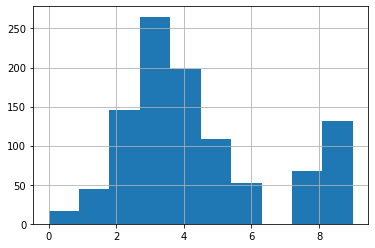

In [47]:
it2['political_scale2'].astype(int).hist()

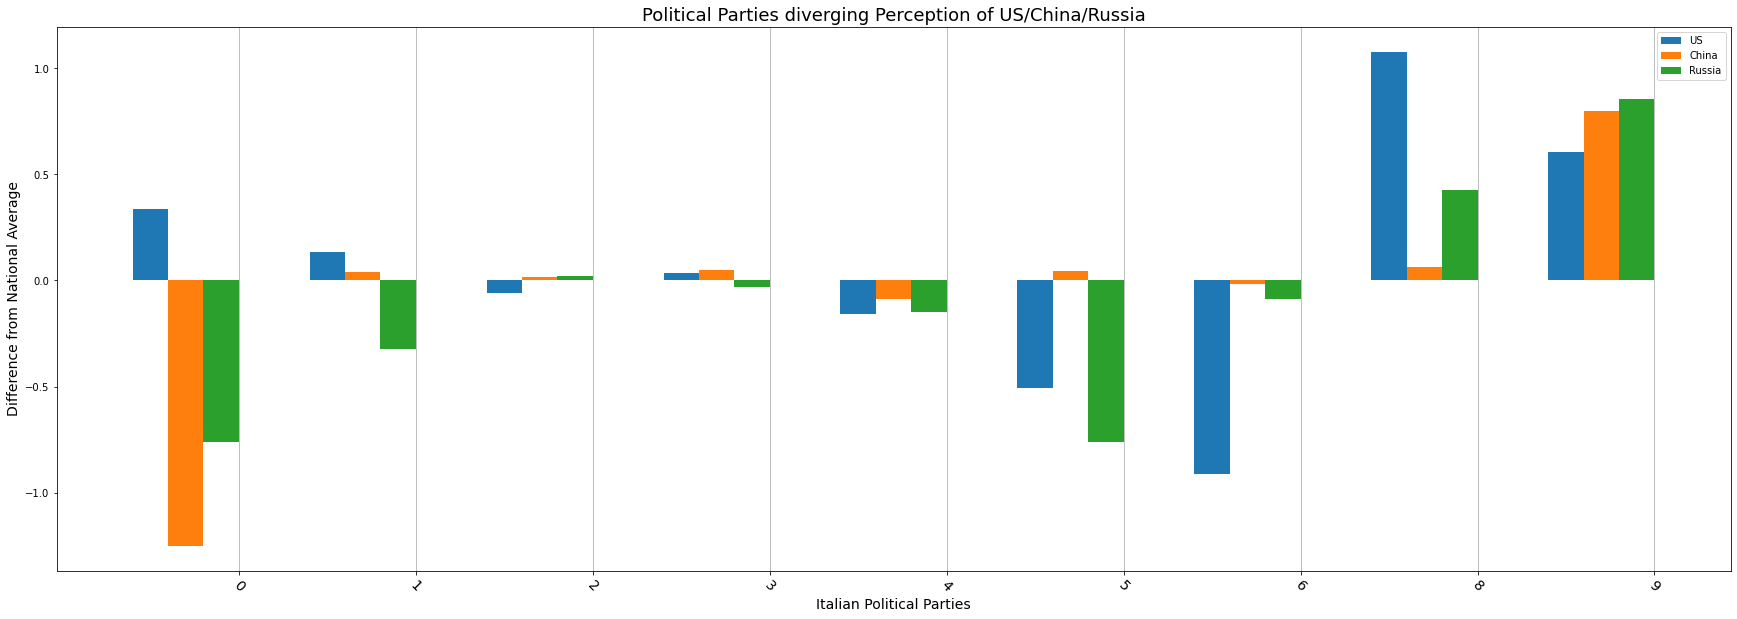

In [57]:
it2.groupby(['political_scale2', 'fav_us'])

itPolPar = it2['political_scale2'].astype(int).value_counts().sort_values(ascending=False).reset_index()

itPolPar['fav_US_ave'] = itPolPar['index'].apply(lambda x: it2[it2['political_scale2'] == x]['fav_us'].mean())
itPolPar['fav_Russia_ave'] = itPolPar['index'].apply(lambda x: it2[it2['political_scale2'] == x]['fav_russia'].mean())
itPolPar['fav_China_ave'] = itPolPar['index'].apply(lambda x: it2[it2['political_scale2'] == x]['fav_china'].mean())

itPolPar = itPolPar.sort_values('index', ascending=True)
x = itPolPar['index']
transparency = (pd.cut(transparency, bins=4, labels=np.arange(4), right=False).astype(int) / 3) + .4
favUS = itPolPar['fav_US_ave'] - it2['fav_us'].mean() 
favChina = itPolPar['fav_China_ave'] - it2['fav_china'].mean() 
favRussia = itPolPar['fav_Russia_ave'] - it2['fav_russia'].mean() 
  
X_axis = np.arange(len(x))
  
figure(figsize=(30, 10))
plt.bar(X_axis - 0.5, favUS, 0.2, label = 'US')
plt.bar(X_axis - 0.3, favChina, 0.2, label = 'China')
plt.bar(X_axis - 0.1, favRussia, 0.2, label = 'Russia')
  

plt.xticks(X_axis, x, rotation=-45, size=14)
plt.grid(axis='x')
plt.xlabel("Italian Political Parties", size=14)
plt.ylabel("Difference from National Average", size=14)
plt.title("Political Parties diverging Perception of US/China/Russia", size=18)
plt.legend()

In [59]:
itPolPar

,index,political_scale2,fav_US_ave,fav_Russia_ave,fav_China_ave
8,0,17,3.000000,2.363636,1.909091
7,1,44,2.800000,2.800000,3.200000
2,2,145,2.602941,3.147059,3.176471
0,3,265,2.697248,3.091743,3.211009
1,4,198,2.506024,2.975904,3.072289
4,5,109,2.155172,2.362069,3.206897
6,6,52,1.750000,3.035714,3.142857
5,8,67,3.741935,3.548387,3.225806
3,9,131,3.270833,3.979167,3.958333


In [76]:
d19.loc[(d19['country'] =='Indonesia')]['allies_new_1'].value_counts()

998    429
188    201
150    120
37      75
109     67
90      56
145     40
996     28
181     22
155     19
9       15
210     13
997     12
161     11
25      11
186      8
83       7
204      5
999      5
212      5
231      5
203      4
205      4
226      4
68       3
221      3
173      2
24       2
134      2
229      2
131      2
143      2
1        2
176      2
56       2
126      2
194      2
142      1
2        1
215      1
85       1
7        1
82       1
209      1
10       1
197      1
206      1
170      1
137      1
21       1
64       1
87       1
187      1
179      1
84       1
Name: allies_new_1, dtype: int64

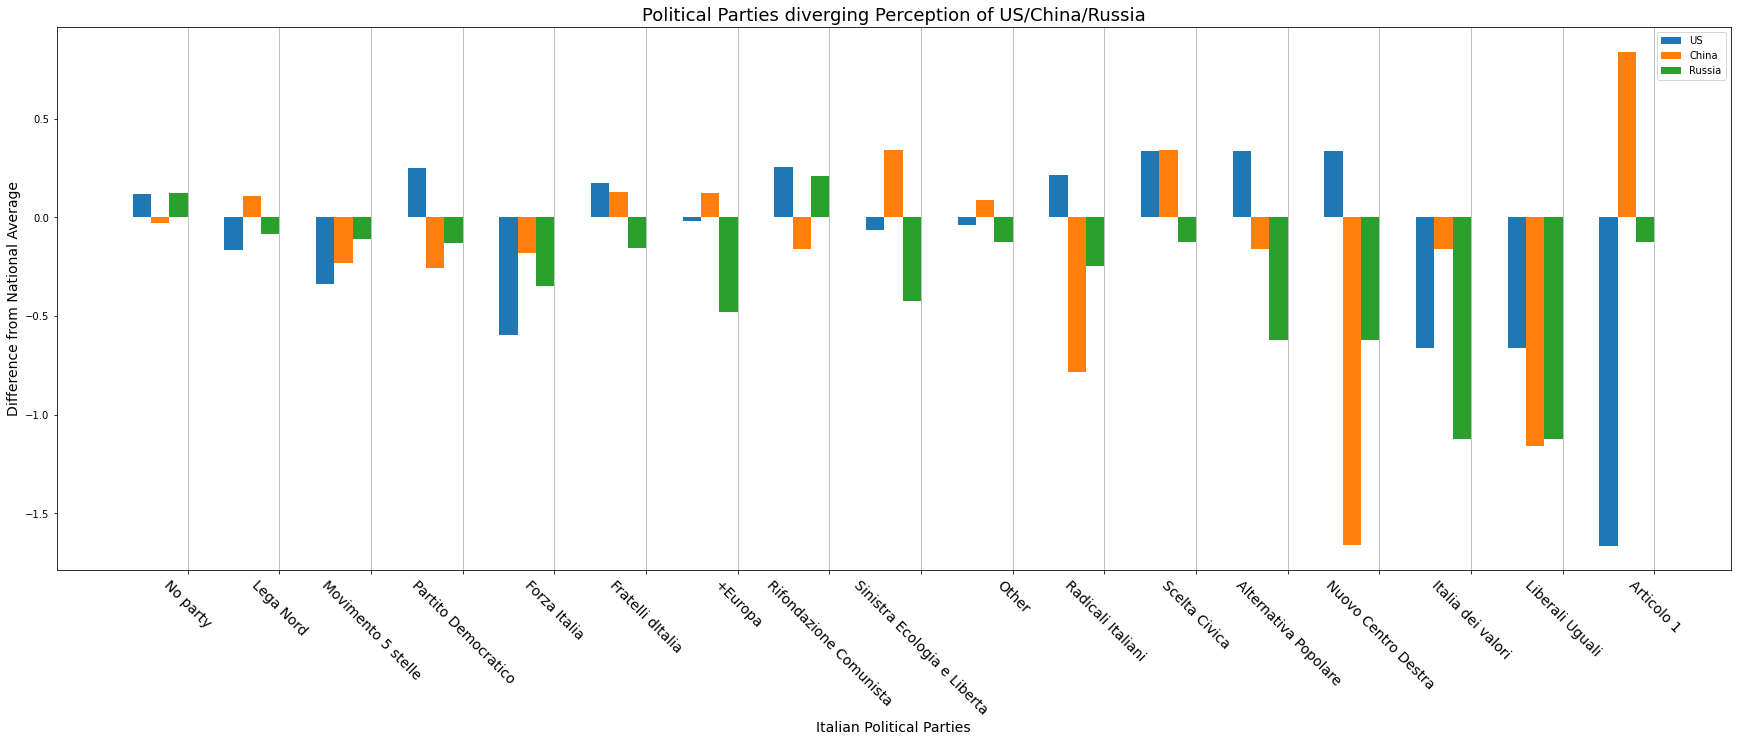

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
  
itPolPar = it2['d_ptyid_proximity_italy'].value_counts().sort_values(ascending=False).reset_index()

itPolPar['fav_US_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_us'].mean())
itPolPar['fav_Russia_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_russia'].mean())
itPolPar['fav_China_ave'] = itPolPar['index'].apply(lambda x: it2[it2['d_ptyid_proximity_italy'] == x]['fav_china'].mean())

itPolPar = itPolPar.sort_values('d_ptyid_proximity_italy', ascending=False)
x = itPolPar['index']
transparency = (pd.cut(transparency, bins=4, labels=np.arange(4), right=False).astype(int) / 3) + .4
favUS = itPolPar['fav_US_ave'] - it2['fav_us'].mean() 
favChina = itPolPar['fav_China_ave'] - it2['fav_china'].mean() 
favRussia = itPolPar['fav_Russia_ave'] - it2['fav_russia'].mean() 
  
X_axis = np.arange(len(x))
  
figure(figsize=(30, 10))
plt.bar(X_axis - 0.5, favUS, 0.2, label = 'US')
plt.bar(X_axis - 0.3, favChina, 0.2, label = 'China')
plt.bar(X_axis - 0.1, favRussia, 0.2, label = 'Russia')
  

plt.xticks(X_axis, x, rotation=-45, size=14)
plt.grid(axis='x')
plt.xlabel("Italian Political Parties", size=14)
plt.ylabel("Difference from National Average", size=14)
plt.title("Political Parties diverging Perception of US/China/Russia", size=18)
plt.legend()


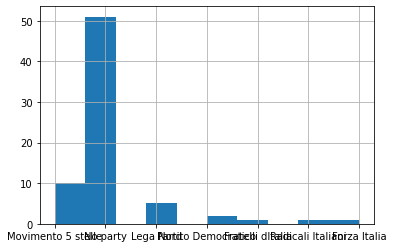

In [114]:
it2[it2['political_scale2'] == 9]['d_ptyid_proximity_italy'].hist()

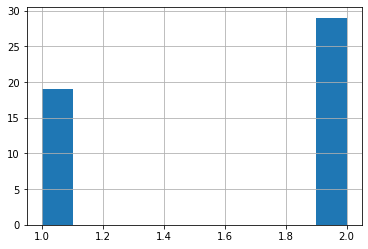

In [95]:
it2[it2['political_scale2'] == 9]['sex'].hist()

In [122]:
list(it2.columns)

['index',
 'id',
 'survey',
 'country',
 'weight',
 'country_satis',
 'econ_sit',
 'children_betteroff2',
 'satisfied_democracy',
 'fav_us',
 'fav_china',
 'fav_russia',
 'fav_eu',
 'partyfav_france_lesrepublicains',
 'partyfav_france_socialistparty',
 'partyfav_france_frontnational',
 'partyfav_france_enmarche',
 'partyfav_germany_cdu',
 'partyfav_germany_spd',
 'partyfav_germany_afd',
 'partyfav_germany_dielinke',
 'partyfav_greece_syriza',
 'partyfav_greece_newdemocracy',
 'partyfav_greece_demcoal',
 'partyfav_greece_goldend',
 'partyfav_hungary_fidesz',
 'partyfav_hungary_mszp',
 'partyfav_hungary_jobbik',
 'partyfav_italy_forza',
 'partyfav_italy_demparty',
 'partyfav_italy_5star',
 'partyfav_italy_leganord',
 'partyfav_netherlands_vvd',
 'partyfav_netherlands_labour',
 'partyfav_netherlands_pvv',
 'partyfav_netherlands_socialist',
 'partyfav_poland_pis',
 'partyfav_poland_po',
 'partyfav_poland_kukiz',
 'partyfav_poland_nowoczesna',
 'partyfav_poland_psl',
 'partyfav_spain_pp',
 

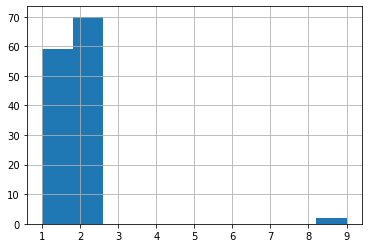

In [133]:
it2[it2['political_scale2'] == 9]['social_net'].hist()

In [136]:
it2.groupby('social_net')['fav_china'].mean()

social_net
1    2.945073
2    3.495074
9    2.333333
Name: fav_china, dtype: float64

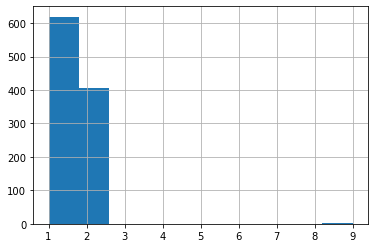

In [134]:
it2['social_net'].hist()

In [97]:
it2.groupby('qs5ita')['fav_russia'].mean()

qs5ita
Central       2.917874
Islands       3.184466
North East    3.296482
North West    3.115523
South         3.140496
Name: fav_russia, dtype: float64

In [ ]:
it2[it2['d_ptyid_proximity_italy'] == 'Lega Nord']['age'].hist()

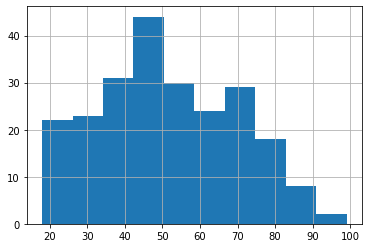

In [82]:
it2[it2['d_ptyid_proximity_italy'] == 'No party']['age'].hist()

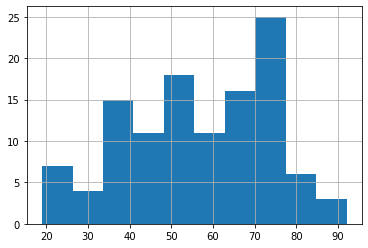

In [84]:
it2[it2['d_ptyid_proximity_italy'] == 'Partito Democratico']['age'].hist()

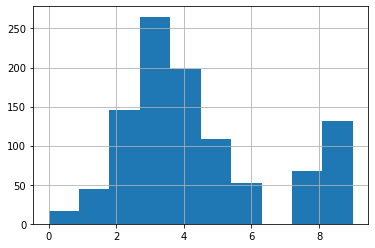

In [99]:
it2['political_scale2'].astype(int).hist()

In [102]:
it2['fav_us'].mean() / d19['fav_us'].mean()

0.9042652006411054

In [103]:
it2['fav_china'].mean() / d19['fav_china'].mean()

0.9341466019234702

In [104]:
it2['fav_russia'].mean() / d19['fav_russia'].mean()

0.8942954499884671

In [89]:
it2[it2['d_ptyid_proximity_italy'] == 'Partito Democratico']['qs5ita'].value_counts(normalize=True)

North East    0.284483
Central       0.275862
North West    0.250000
South         0.137931
Islands       0.051724
Name: qs5ita, dtype: float64

In [93]:
it2[it2['d_ptyid_proximity_italy'] == 'Partito Democratico'].groupby('qs5ita')['fav_us'].mean()

qs5ita
Central       2.500000
Islands       3.500000
North East    3.121212
North West    3.034483
South         2.875000
Name: fav_us, dtype: float64

In [88]:
it2['qs5ita'].value_counts(normalize=True)

North West    0.269455
South         0.235409
Central       0.201362
North East    0.193580
Islands       0.100195
Name: qs5ita, dtype: float64

In [90]:
it2.groupby('qs5ita')['fav_us'].mean()

qs5ita
Central       2.338164
Islands       2.873786
North East    3.105528
North West    2.592058
South         2.570248
Name: fav_us, dtype: float64

In [91]:
it2.groupby('qs5ita')['fav_china'].mean()

qs5ita
Central       3.275362
Islands       3.145631
North East    3.291457
North West    2.935018
South         3.219008
Name: fav_china, dtype: float64

In [110]:
it2['d_ptyid_proximity_italy'].value_counts(normalize=True)

No party                       0.265517
Lega Nord                      0.255172
Movimento 5 stelle             0.188506
Partito Democratico            0.133333
Forza Italia                   0.051724
Fratelli dItalia               0.035632
+Europa                        0.016092
Rifondazione Comunista         0.013793
Sinistra Ecologia e Liberta    0.011494
Other                          0.009195
Radicali Italiani              0.009195
Scelta Civica                  0.002299
Alternativa Popolare           0.002299
Nuovo Centro Destra            0.002299
Liberali Uguali                0.001149
Italia dei valori              0.001149
Articolo 1                     0.001149
Name: d_ptyid_proximity_italy, dtype: float64

In [108]:
it2['political_scale2'] = it2['political_scale2'].astype(int)
it2.groupby('d_ptyid_proximity_italy')['political_scale2'].mean()

d_ptyid_proximity_italy
+Europa                        2.357143
Alternativa Popolare           4.500000
Articolo 1                     2.000000
Forza Italia                   4.355556
Fratelli dItalia               4.645161
Italia dei valori              4.000000
Lega Nord                      4.504505
Liberali Uguali                2.000000
Movimento 5 stelle             3.615854
No party                       5.186147
Nuovo Centro Destra            3.500000
Other                          3.625000
Partito Democratico            2.301724
Radicali Italiani              2.875000
Rifondazione Comunista         1.250000
Scelta Civica                  2.500000
Sinistra Ecologia e Liberta    2.000000
Name: political_scale2, dtype: float64

In [62]:
itPolPar

,index,d_ptyid_proximity_italy,fav_US_ave,fav_Russia_ave,fav_China_ave
0,No party,231,2.783550,3.246753,3.129870
1,Lega Nord,222,2.500000,3.040541,3.270270
2,Movimento 5 stelle,164,2.323171,3.012195,2.926829
3,Partito Democratico,116,2.913793,2.991379,2.905172
4,Forza Italia,45,2.066667,2.777778,2.977778
5,Fratelli dItalia,31,2.838710,2.967742,3.290323
6,+Europa,14,2.642857,2.642857,3.285714
7,Rifondazione Comunista,12,2.916667,3.333333,3.000000
8,Sinistra Ecologia e Liberta,10,2.600000,2.700000,3.500000
9,Other,8,2.625000,3.000000,3.250000


### Political Party Analysis Sweden

In [186]:
sw = df.loc[(df['year'] == 2019) & (df['country'] == 'Sweden') & (df['fav_us'] != 8) & (df['fav_us'] != 9)].reset_index()

swedenPID = {
    1: "Swedish Social Democratic Party", 
    2: "Moderate Party", 
    3: "Sweden Democrats",
    4: "Green Party", 
    5: "Centre Party",
    6: "Left Party", 
    7: "Liberals",
    8: "Christian Democrats", 
    9: "Feminist Initiative", 
    10: "Other", 
    11: "No party", 
    98: "Don't know", 
    99: "refused"
}

sw['d_ptyid_proximity_sweden'] = sw['d_ptyid_proximity_sweden'].astype(int).map(swedenPID)

In [187]:
swPolPar = sw['d_ptyid_proximity_sweden'].value_counts().sort_values(ascending=False).reset_index()

In [188]:
swPolPar['fav_US_ave'] = swPolPar['index'].apply(lambda x: sw[sw['d_ptyid_proximity_sweden'] == x]['fav_us'].mean())
swPolPar['fav_Russia_ave'] = swPolPar['index'].apply(lambda x: sw[sw['d_ptyid_proximity_sweden'] == x]['fav_russia'].mean())
swPolPar['fav_China_ave'] = swPolPar['index'].apply(lambda x: sw[sw['d_ptyid_proximity_sweden'] == x]['fav_china'].mean())



In [189]:
transparency = swPolPar['d_ptyid_proximity_sweden'] * 100 / swPolPar['d_ptyid_proximity_sweden'].sum()

for i in range(0, len(swPolPar)): 
    swPolPar['index'][i] = swPolPar['index'][i] + " (" + str(transparency[i].round(2)) + ")"

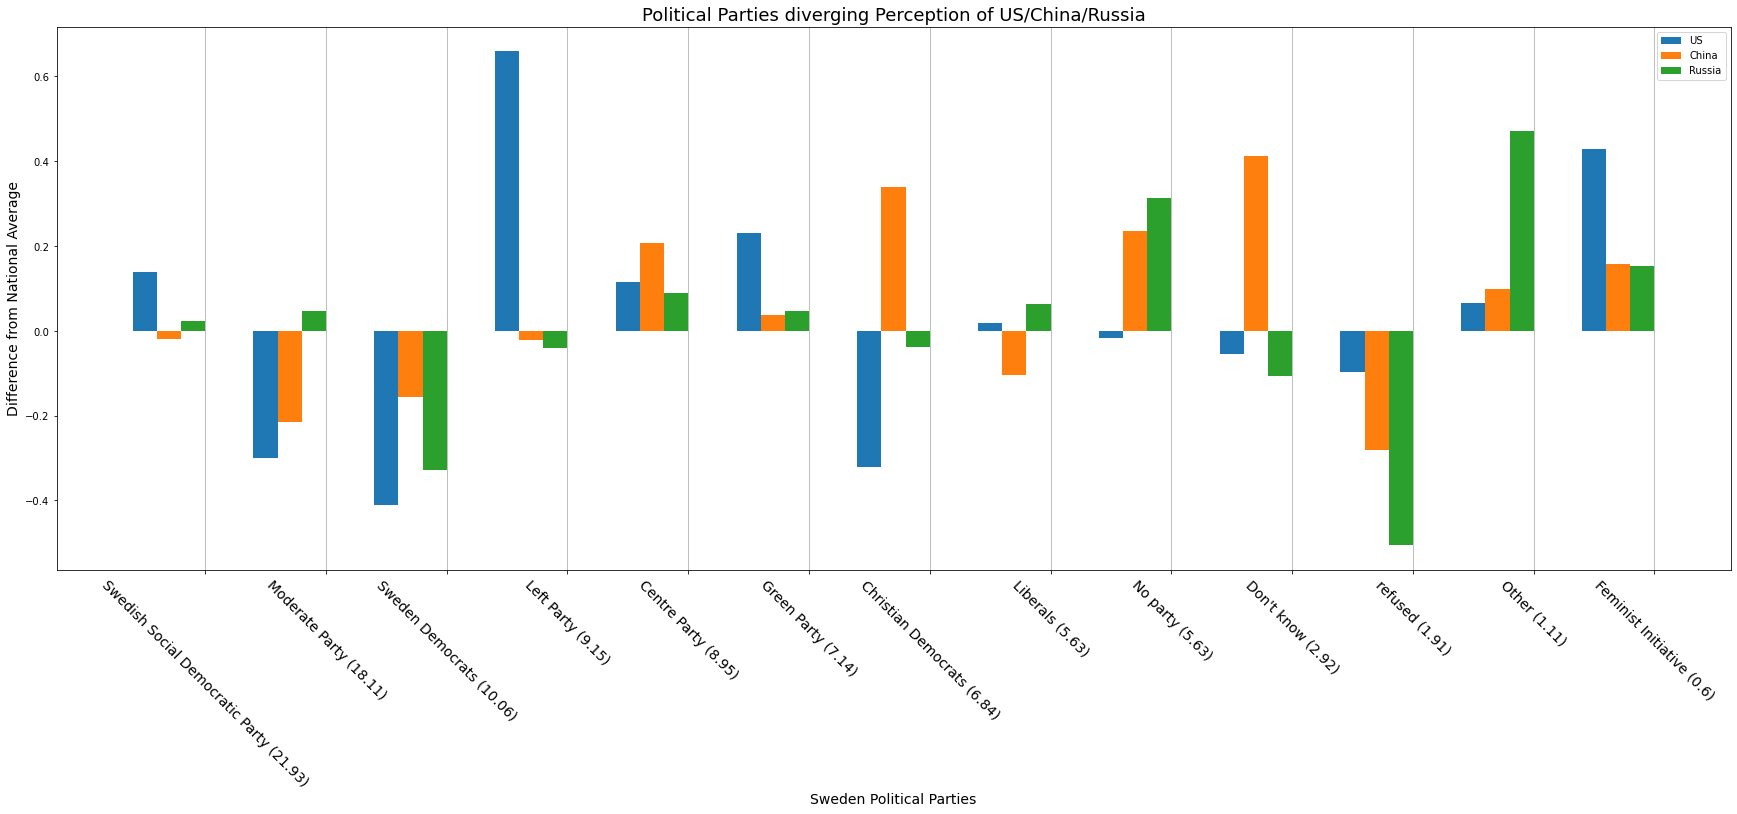

In [190]:
swPolPar = swPolPar.sort_values('d_ptyid_proximity_sweden', ascending=False)
x = swPolPar['index']

favUS = swPolPar['fav_US_ave'] - sw['fav_us'].mean() 
favChina = swPolPar['fav_China_ave'] - sw['fav_china'].mean() 
favRussia = swPolPar['fav_Russia_ave'] - sw['fav_russia'].mean() 
  
X_axis = np.arange(len(x))
  
figure(figsize=(30, 10))
plt.bar(X_axis - 0.5, favUS, 0.2, label = 'US')
plt.bar(X_axis - 0.3, favChina, 0.2, label = 'China')
plt.bar(X_axis - 0.1, favRussia, 0.2, label = 'Russia')
  

plt.xticks(X_axis, x, rotation=-45, size=14)
plt.grid(axis='x')
plt.xlabel("Sweden Political Parties", size=14)
plt.ylabel("Difference from National Average", size=14)
plt.title("Political Parties diverging Perception of US/China/Russia", size=18)
plt.legend()



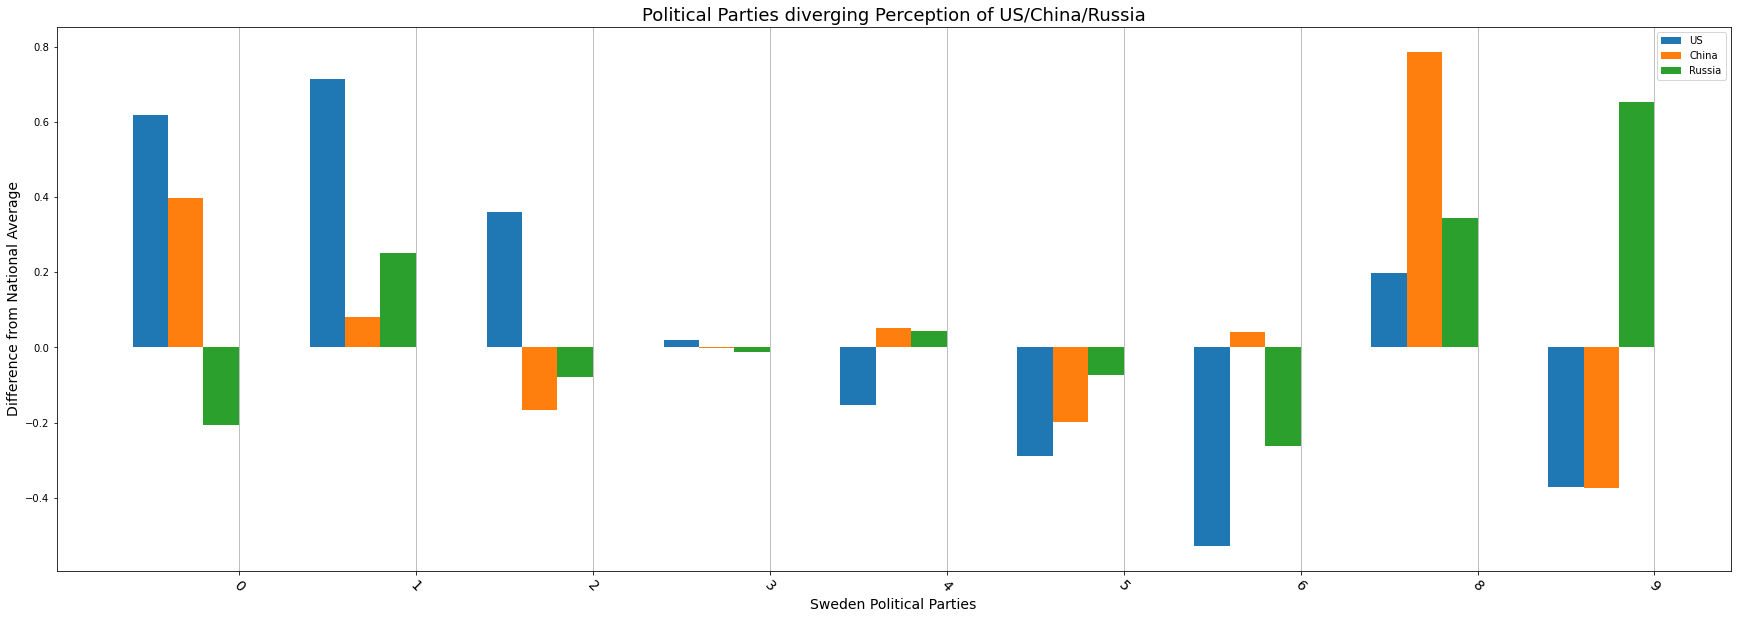

In [191]:

sw['political_scale2'] = sw['political_scale2'].astype(int)
swPolPar = sw['political_scale2'].astype(int).value_counts().reset_index().sort_values(by='index')

swPolPar['fav_US_ave'] = swPolPar['index'].apply(lambda x: sw[sw['political_scale2'] == x]['fav_us'].mean())
swPolPar['fav_Russia_ave'] = swPolPar['index'].apply(lambda x: sw[sw['political_scale2'] == x]['fav_russia'].mean())
swPolPar['fav_China_ave'] = swPolPar['index'].apply(lambda x: sw[sw['political_scale2'] == x]['fav_china'].mean())

swPolPar = swPolPar.sort_values('index', ascending=True)
x = swPolPar['index']

favUS = swPolPar['fav_US_ave'] - sw['fav_us'].mean() 
favChina = swPolPar['fav_China_ave'] - sw['fav_china'].mean() 
favRussia = swPolPar['fav_Russia_ave'] - sw['fav_russia'].mean() 
  
X_axis = np.arange(len(x))
  
figure(figsize=(30, 10))
plt.bar(X_axis - 0.5, favUS, 0.2, label = 'US')
plt.bar(X_axis - 0.3, favChina, 0.2, label = 'China')
plt.bar(X_axis - 0.1, favRussia, 0.2, label = 'Russia')
  

plt.xticks(X_axis, x, rotation=-45, size=14)
plt.grid(axis='x')
plt.xlabel("Sweden Political Parties", size=14)
plt.ylabel("Difference from National Average", size=14)
plt.title("Political Parties diverging Perception of US/China/Russia", size=18)
plt.legend()


In [178]:
swPolPar

,index,political_scale2,fav_US_ave,fav_Russia_ave,fav_China_ave
7,0,22,3.454545,3.136364,3.500000
4,1,35,3.285714,3.600000,3.257143
3,2,119,2.932773,3.268908,3.008403
0,3,358,2.592179,3.335196,3.173184
1,4,283,2.416961,3.392226,3.226148
2,5,125,2.336000,3.320000,3.024000
6,6,23,2.043478,3.086957,3.217391
5,8,26,2.769231,3.692308,3.961538
8,9,7,4.142857,5.428571,4.571429


In [198]:
sw['fav_russia'].mean() / d19['fav_russia'].mean()

0.9585852971373379

In [205]:
sw = d19.loc[(d19['country'] == 'Sweden') & (d19['fav_us'] != 8) & (d19['fav_us'] != 9)].reset_index()

In [211]:
sw.groupby('region_sweden')['fav_russia'].mean()

region_sweden
1    3.245614
2    3.037037
3    3.355191
4    3.333333
5    3.365079
6    3.532995
7    3.374359
8    3.254464
Name: fav_russia, dtype: float64

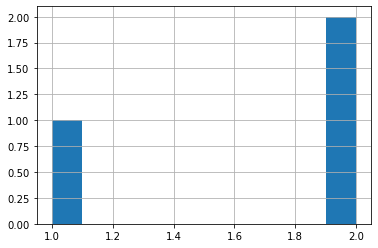

In [212]:
sw[sw['political_scale2'] == 4]['social_net'].hist()

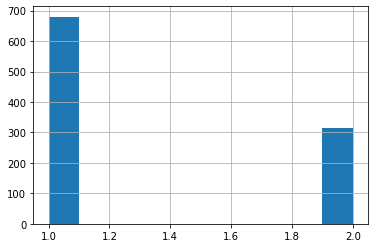

In [213]:
sw['social_net'].hist()

In [219]:
sw.groupby('social_net')['fav_us'].mean() / sw['fav_us'].mean()

social_net
1    1.003676
2    0.992038
Name: fav_us, dtype: float64

In [204]:
list(d19.columns)

['id',
 'survey',
 'country',
 'weight',
 'ladder_now',
 'country_satis',
 'econ_sit',
 'children_betteroff2',
 'satisfied_democracy',
 'religion20yr',
 'religion20yr_fu',
 'fav_us',
 'fav_china',
 'fav_russia',
 'fav_eu',
 'fav_un',
 'fav_germany',
 'fav_nato',
 'partyfav_argentina_cambiemos',
 'partyfav_argentina_kirchnerismo',
 'partyfav_argentina_peronismo',
 'partyfav_australia_labour',
 'partyfav_australia_liberal',
 'partyfav_australia_greens',
 'partyfav_australia_onenation',
 'partyfav_brazil_pmdb',
 'partyfav_brazil_psdb',
 'partyfav_brazil_pp',
 'partyfav_brazil_pt',
 'partyfav_bulgaria_gerb',
 'partyfav_bulgaria_bsp',
 'partyfav_bulgaria_dps',
 'partyfav_canada_lib',
 'partyfav_canada_cons',
 'partyfav_canada_ndp',
 'partyfav_czech_ano',
 'partyfav_czech_ods',
 'partyfav_czech_pirati',
 'partyfav_czech_spd',
 'partyfav_france_lesrepublicains',
 'partyfav_france_socialistparty',
 'partyfav_france_frontnational',
 'partyfav_france_enmarche',
 'partyfav_france_insoumise',
 'pa

In [193]:
sw['political_scale2'] = sw['political_scale2'].astype(int)
sw.groupby('d_ptyid_proximity_sweden')['political_scale2'].agg(['mean', 'count'])

,mean,count
d_ptyid_proximity_sweden,,
Centre Party,3.516854,89
Christian Democrats,4.058824,68
Don't know,3.931034,29
Feminist Initiative,1.500000,6
Green Party,3.014085,71
Left Party,1.912088,91
Liberals,3.857143,56
Moderate Party,4.177778,180
No party,4.000000,56


In [195]:
sw[sw['political_scale2'] == 9]['d_ptyid_proximity_sweden'].value_counts()

Liberals                           2
Green Party                        2
Swedish Social Democratic Party    1
Name: d_ptyid_proximity_sweden, dtype: int64

In [194]:
sw['d_ptyid_proximity_sweden'].value_counts(normalize=True)

Swedish Social Democratic Party    0.219316
Moderate Party                     0.181087
Sweden Democrats                   0.100604
Left Party                         0.091549
Centre Party                       0.089537
Green Party                        0.071429
Christian Democrats                0.068410
No party                           0.056338
Liberals                           0.056338
Don't know                         0.029175
refused                            0.019115
Other                              0.011066
Feminist Initiative                0.006036
Name: d_ptyid_proximity_sweden, dtype: float64

In [185]:
sw[sw['political_scale2'].astype(int) == 9]

,index,id,survey,country,weight,country_satis,econ_sit,children_betteroff2,satisfied_democracy,fav_us,fav_china,fav_russia,fav_eu,partyfav_france_lesrepublicains,partyfav_france_socialistparty,partyfav_france_frontnational,partyfav_france_enmarche,partyfav_germany_cdu,partyfav_germany_spd,partyfav_germany_afd,partyfav_germany_dielinke,partyfav_greece_syriza,partyfav_greece_newdemocracy,partyfav_greece_demcoal,partyfav_greece_goldend,partyfav_hungary_fidesz,partyfav_hungary_mszp,partyfav_hungary_jobbik,partyfav_italy_forza,partyfav_italy_demparty,partyfav_italy_5star,partyfav_italy_leganord,partyfav_netherlands_vvd,partyfav_netherlands_labour,partyfav_netherlands_pvv,partyfav_netherlands_socialist,partyfav_poland_pis,partyfav_poland_po,partyfav_poland_kukiz,partyfav_poland_nowoczesna,partyfav_poland_psl,partyfav_spain_pp,partyfav_spain_psoe,partyfav_spain_podemos,partyfav_spain_citizens,partyfav_sweden_sap,partyfav_sweden_moderateparty,partyfav_sweden_swedendems,partyfav_uk_conservative,partyfav_uk_labour,partyfav_uk_ukip,partyfav_uk_libdems,econ_power,confid_trump,confid_xi,confid_putin,confid_merkel,use_internet,own_cell_standalone,smartphone,social_net,mex_live_us,sex,age,travel_us,friends_abroad_intouch,friends_us_intouch,receive_money,d_relig_argentina,d_relig_australia,d_relig_brazil,d_relig_canada,d_relig_france,d_relig_germany,d_relig_greece,d_relig_hungary,d_relig_india_a,d_relig2_india_a,d_relig_indonesia,d_relig_israel,d_relig_israel_jewish,d_relig_japan_a,d_relig_kenya,d_relig_mexico,d_relig_netherlands,d_relig_nigeria,d_relig_philippines,d_relig_poland,d_relig_russia,d_relig_safrica,d_relig_skorea_a,d_relig_spain,d_relig_sweden,d_relig_tunisia,d_relig_uk,d_relig_us,d_relig_us_christian,d_relig_us2,muslim_branch,pray_several,pray_salah,religion_import,d_educ_argentina_2017,d_educ_australia_2017,d_educ_australia_2017a,d_educ_australia_2017b,d_educ_brazil,d_educ_canada_2017,d_educ_france,d_educ_germany_2017,d_educ_germany_vocational,d_educ_greece,d_educ_hungary,d_educ_india,d_educ_indonesia,d_educ_israel,d_educ_israel_vocational,d_educ_israel_years,d_educ_italy_2017,d_educ_japan,d_educ_kenya,d_educ_mexico_2017,d_educ_netherlands,d_educ_nigeria,d_educ_philippines,d_educ_poland_2017,d_educ_safrica_2017,d_educ_skorea_2017,d_educ_spain,d_educ_sweden,d_educ_tunisia_2017,d_educ_uk_2017,d_educ_us_2017,d_income_argentina,d_income_australia,d_income_brazil,d_income_canada,d_income_france,d_income_germany,d_income_greece,d_income_hungary,d_income_india,d_income_indonesia,d_income_israel,d_income_italy,d_income_japan,d_income_kenya,d_income_mexico,d_income_netherlands,d_income_nigeria,d_income_philippines,d_income_poland,d_income_russia,d_income_safrica,d_income_skorea,d_income_spain,d_income_sweden,d_income_tunisia,d_income_uk_cat,d_income_uk_month,d_income_uk_week,d_income_uk_year,d_income_us,d_income2_argentina,d_income2_australia,d_income2_brazil,d_income2_canada,d_income2_france,d_income2_germany,d_income2_greece,d_income2_hungary,d_income2_india,d_income2_indonesia,d_income2_israel,d_income2_italy,d_income2_japan,d_income2_kenya,d_income2_mexico,d_income2_netherlands,d_income2_nigeria,d_income2_philippines,d_income2_poland,d_income2_russia,d_income2_safrica,d_income2_skorea,d_income2_spain,d_income2_sweden,d_income2_tunisia,d_income2_uk,d_income2_us,d_ethnicity_brazil,d_ethnicity_indonesia,d_ethnicity_israel,d_ethnicity_kenya,d_ethnicity_nigeria,d_ethnicity_philippines,d_ethnicity_safrica,d_hisp_originus,d_race_us_2,d_race_us_3,d_race_us_4,d_born_us,d_hhpeople,d_adult_us,political_scale2,d_ptyid_proximity_argentina,d_ptyid_proximity_australia,d_ptyid_proximity_brazil,d_ptyid_proximity_canada,d_ptyid_proximity_france,d_ptyid_proximity_germany,d_ptyid_proximity_greece,d_ptyid_proximity_hungary,d_ptyid_proximity_india,d_ptyid_proximity_indonesia,d_ptyid_proximity_israel,d_ptyid_proximity_italy,d_ptyid_proximity_kenya,d_ptyid_proximity_mexico,d_ptyid_proximity_netherlands,d_ptyid_proximity_nigeria,d_ptyid_proximity_philippines

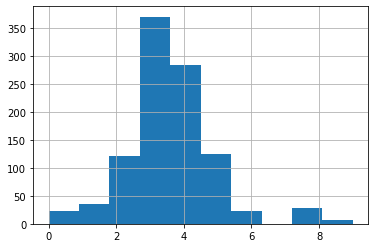

In [146]:
sw['political_scale2'].astype(int).hist()

### Export Data for ArcGIS 

In [35]:
rita.to_csv('/Users/natalie_kraft/Documents/LAS/PewData/ItalyRegions.csv')

### Looking into PSU Area Codes

In [36]:
it.groupby(['psu_it', 'qs5it'])['id'].count()

KeyError: 'psu_it'

In [ ]:
italy_psa = pd.read_excel('/Users/natalie_kraft/Documents/LAS/LAU-2016.xlsx', sheet_name="IT")

In [ ]:
it.columns

In [ ]:
italy_psa.groupby('NUTS 3 CODE')['LAU CODE'].count()

In [ ]:
italy_psa.groupby('NUTS 3 CODE')['DEGURBA'].count()

In [ ]:
it['psu_ita']

In [ ]:
df[df['country'] == 'Italy'].groupby('psu_ita').count()

In [ ]:
pd.set_option('display.max_columns', None)
df.loc[(df['country'] == 'Italy') & ((df['psu_ita'] == "21092") | (df['psu_ita'] == "21000092"))]

In [ ]:
shp = pd.DataFrame()
for i, col in enumerate(df.columns):
    if type(df[col][0]) != str:
        shp[col] = df.groupby('country')[col].sum() / df.groupby('country')[col].count()

In [ ]:
d19.groupby('country').count()

In [ ]:
d19.groupby('country')['partyfav_argentina_kirchnerismo'].head()

In [ ]:
list(d19.columns)

In [ ]:
d19 = d19.drop(columns=['partyfav_argentina_kirchnerismo', 'partyfav_argentina_peronismo',
 'partyfav_australia_labour',
 'partyfav_australia_liberal',
 'partyfav_australia_greens',
 'partyfav_australia_onenation',
 'partyfav_brazil_pmdb',
 'partyfav_brazil_psdb',
 'partyfav_brazil_pp',
 'partyfav_brazil_pt',
 'partyfav_bulgaria_gerb',
 'partyfav_bulgaria_bsp',
 'partyfav_bulgaria_dps',
 'partyfav_canada_lib',
 'partyfav_canada_cons',
 'partyfav_canada_ndp',
 'partyfav_czech_ano',
 'partyfav_czech_ods',
 'partyfav_czech_pirati',
 'partyfav_czech_spd',
 'partyfav_france_lesrepublicains',
 'partyfav_france_socialistparty',
 'partyfav_france_frontnational',
 'partyfav_france_enmarche',
 'partyfav_france_insoumise',
 'partyfav_germany_cdu',
 'partyfav_germany_spd',
 'partyfav_germany_afd',
 'partyfav_germany_dielinke',
 'partyfav_germany_greens',
 'partyfav_greece_syriza',
 'partyfav_greece_newdemocracy',
 'partyfav_greece_demcoal',
 'partyfav_greece_goldend',
 'partyfav_hungary_fidesz',
 'partyfav_hungary_mszp',
 'partyfav_hungary_jobbik',
 'partyfav_india_bjp',
 'partyfav_india_inc',
 'partyfav_indonesia_pdip',
 'partyfav_indonesia_gerindra',
 'partyfav_indonesia_golkar',
 'partyfav_indonesia_demokrat',
 'partyfav_indonesia_pkb',
 'partyfav_israel_likud',
 'partyfav_israel_bluewhite',
 'partyfav_israel_hadasht',
 'partyfav_israel_labor',
 'partyfav_italy_forza',
 'partyfav_italy_demparty',
 'partyfav_italy_5star',
 'partyfav_italy_leganord',
 'partyfav_japan_ldp',
 'partyfav_japan_dp',
 'partyfav_japan_cdp',
 'partyfav_japan_hope',
 'partyfav_japan_komeito',
 'partyfav_kenya_jubilee',
 'partyfav_kenya_nasa',
 'partyfav_kenya_kanu',
 'partyfav_kenya_narc',
 'partyfav_lebanon_fpm',
 'partyfav_lebanon_future',
 'partyfav_lebanon_amal',
 'fav_hezbollah',
 'partyfav_lithuania_lvzs',
 'partyfav_lithuania_ts',
 'partyfav_lithuania_lsdp',
 'partyfav_lithuania_lrls',
 'partyfav_mexico_pan',
 'partyfav_mexico_pri',
 'partyfav_mexico_morena',
 'partyfav_mexico_prd',
 'partyfav_netherlands_vvd',
 'partyfav_netherlands_labour',
 'partyfav_netherlands_pvv',
 'partyfav_netherlands_socialist',
 'partyfav_netherlands_fvd',
 'partyfav_netherlands_dem66',
 'partyfav_nigeria_apc',
 'partyfav_nigeria_pdp',
 'partyfav_nigeria_apga',
 'partyfav_nigeria_lp',
 'partyfav_philippines_liberal',
 'partyfav_philippines_una',
 'partyfav_philippines_pdplaban',
 'partyfav_philippines_nacionalista',
 'partyfav_philippines_lakas',
 'partyfav_poland_pis',
 'partyfav_poland_po',
 'partyfav_poland_kukiz',
 'partyfav_poland_nowoczesna',
 'partyfav_poland_psl',
 'partyfav_russia_edinaya',
 'partyfav_russia_kprf',
 'partyfav_russia_ldpr',
 'partyfav_russia_spraved',
 'partyfav_russia_yabloko',
 'partyfav_slovakia_smer',
 'partyfav_slovakia_sas',
 'partyfav_slovakia_olano',
 'partyfav_slovakia_sns',
 'partyfav_safrica_anc',
 'partyfav_safrica_da',
 'partyfav_safrica_eff',
 'partyfav_safrica_ifp',
 'partyfav_spain_pp',
 'partyfav_spain_psoe',
 'partyfav_spain_podemos',
 'partyfav_spain_citizens',
 'partyfav_spain_vox',
 'partyfav_sweden_sap',
 'partyfav_sweden_moderateparty',
 'partyfav_sweden_swedendems',
 'partyfav_tunisia_ennahdha',
 'partyfav_tunisia_nidaa',
 'partyfav_tunisia_popfront',
 'partyfav_turkey_akp',
 'partyfav_turkey_chp',
 'partyfav_turkey_mhp',
 'partyfav_turkey_iyi',
 'partyfav_turkey_hdp',
 'partyfav_ukraine_solidarity',
 'partyfav_ukraine_pf',
 'partyfav_ukraine_ob',
 'partyfav_ukraine_sr',
 'partyfav_uk_conservative',
 'partyfav_uk_labour',
 'partyfav_uk_ukip',
 'partyfav_uk_libdems'] )

In [ ]:
shp['fav_US']

In [ ]:
shp = shp.drop(columns=['Unnamed: 0', 'ID'])
shp['year'] = "2017"

In [ ]:
shp

In [ ]:
shp.to_csv("/Users/natalie_kraft/Documents/LAS/AggPewShp.csv")

In [ ]:
export = pd.merge(shape, shp, left_on="ADMIN", right_on="Country", how="outer")

In [ ]:
export[['ADMIN', 'geometry', 'fav_US', 'fav_Russia', 'fav_China']].to_file("/Users/natalie_kraft/Documents/LAS/AggPew.geojson", driver = "GeoJSON")

In [ ]:
export

In [ ]:
export.to_csv("/Users/natalie_kraft/Documents/LAS/AggPewAll.csv")

In [ ]:
# test = geo.read_file("/Users/natalie_kraft/Documents/LAS/AggPew.geojson")